In [1]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 5.1 MB/s 
     |████████████████████████████████| 19.2 MB 223 kB/s 
     |████████████████████████████████| 240 kB 54.1 MB/s 
     |████████████████████████████████| 112 kB 70.8 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 37.5 MB 47 kB/s 
     |████████████████████████████████| 943 kB 66.6 MB/s 
     |████████████████████████████████| 1.6 MB 46.5 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
     |████████████████████████████████| 4.0 MB 46.6 MB/s 
     |████████████████████████████████| 112 kB 57.7 MB/s 
  Created wheel for qiskit: filename=qiskit-0.38.0-py3-none-any.whl size=12147 sha256=27370cfc589c8af13ea8c016bd418babae715d504d8cc530e876cd2011d43744
  Stored in directory: /root/.cache/pip/wheels/0b/30/78/04c91b

In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
%matplotlib inline
import math

In [3]:
qasm_simulator = Aer.get_backend('qasm_simulator')
statevector_simulator = Aer.get_backend('statevector_simulator')

In [4]:
def run_on_simulators(circuit):
    statevec_job = execute(circuit, backend=statevector_simulator)
    result = statevec_job.result()
    statevec = result.get_statevector()
    
    num_qubits = circuit.num_qubits
    circuit.measure([i for i in range(num_qubits)], [i for i in range(num_qubits)])
    
    qasm_job = execute(circuit, backend=qasm_simulator, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

In [5]:
circuit = QuantumCircuit(2,2)
statevec, counts = run_on_simulators(circuit)

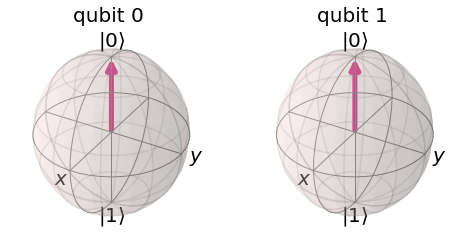

In [6]:
plot_bloch_multivector(statevec)

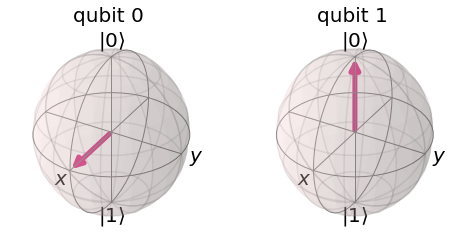

In [7]:
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

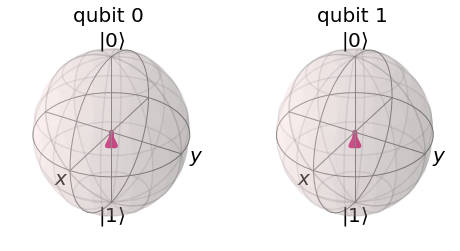

In [8]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

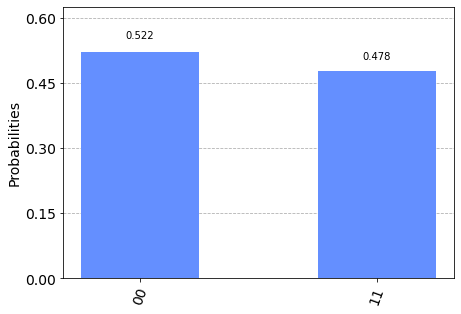

In [9]:
plot_histogram([counts])

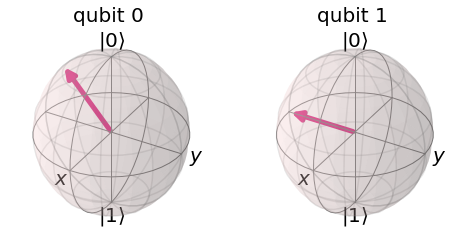

In [10]:
circuit = QuantumCircuit(2,2)
circuit.rx(math.pi/4, 0)
circuit.rx(math.pi / 2, 1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

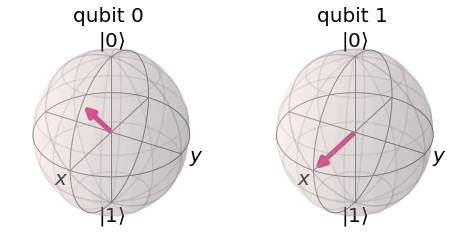

In [11]:
circuit = QuantumCircuit(2,2)
circuit.ry(math.pi/4, 0)
circuit.ry(math.pi / 2, 1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

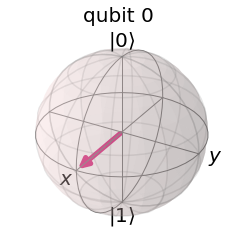

In [12]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

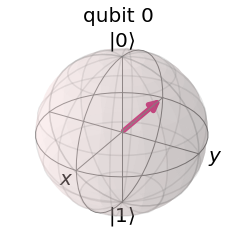

In [13]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

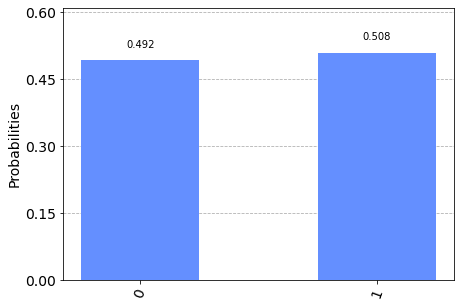

In [14]:
plot_histogram([counts])